# Assignment 2

## Problem 1:Linear Regression

### Task 1:Load the dataset named assignment2_part1.csv 



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Data set

In [2]:
data = pd.read_csv("/content/drive/My Drive/Untitled folder/assignment2_part1.csv", index_col='Unnamed: 0')
data.head(10)

,x,y
0,-15.0,-2156.994097
1,-14.5,-1956.523904
2,-14.0,-1778.151738
3,-13.5,-1610.924846
4,-13.0,-1456.176307
5,-12.5,-1302.029411
6,-12.0,-1170.000646
7,-11.5,-1044.071813
8,-11.0,-917.935911
9,-10.5,-811.861672


In [3]:
len(data)

80

### Task 2:Split this given dataset into training set,testing set and validation set (80% data as training set,10% as testing and other 10% as validation)

## Split the data set into Training, Testing and Validation Set

In [0]:
train_data, test_data, validate_data = np.split(data.sample(frac = 1), [int(len(data)*0.8), int(len(data)*0.9)])

In [5]:
print("Length of Training Data : {}, Length of Test Data : {}, and Length of Validation Data : {}".format(len(train_data), len(test_data), len(validate_data)))

Length of Training Data : 64, Length of Test Data : 8, and Length of Validation Data : 8


### Task 3: Visualize the data and try to fit a linear (regression) model to it and comment whether you think this data is suitable to fit a linear model.

## Visualizing the Training Data Set

[Text(0, 0.5, 'y'), Text(0.5, 0, 'x')]

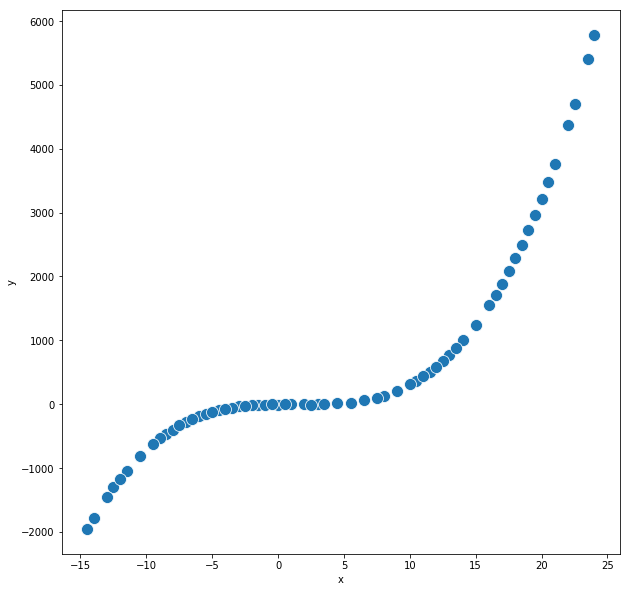

In [6]:
fig, ax = plt.subplots(figsize = (10,10))
sns.set_context(context = 'poster', font_scale = 0.9)
sns.set_style(style = 'whitegrid')
sns.scatterplot(x='x', y ='y', data = train_data, palette= 'spectral')
ax.set(xlabel='x', ylabel='y')


## Performing regression on Training data set

In [7]:
temp_data = train_data.copy()
lm = smf.ols(formula='y~x', data = temp_data).fit()
temp_data['Prediction'] = lm.predict()
temp_data.head()

,x,y,Prediction
18,-6.0,-190.366598,-683.250517
58,14.0,997.777927,1879.307847
24,-3.0,-35.624306,-298.866762
74,22.0,4371.531453,2904.331193
19,-5.5,-152.135063,-619.186558


## R2 Score of the Training data set

In [8]:
print('R2 Score: ',r2_score(temp_data['y'],temp_data['Prediction']))

R2 Score:  0.7746373542993208


### Task 4: Visualize the regression fit

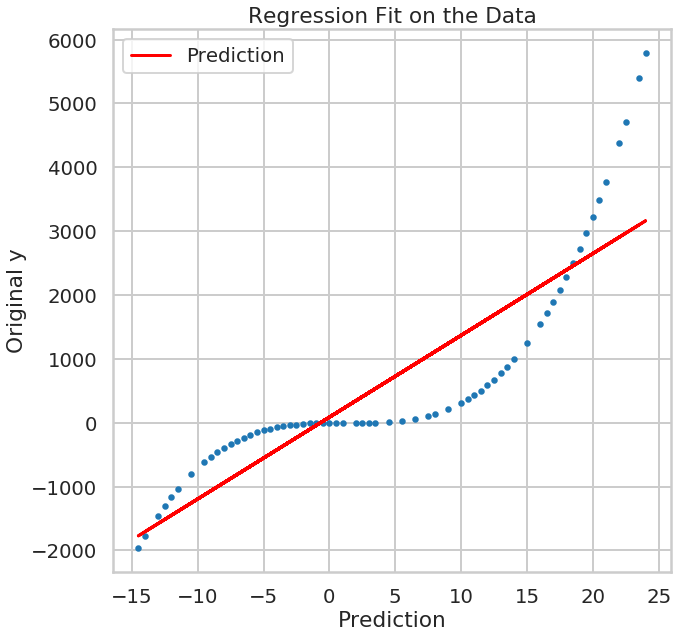

In [9]:
fig, ax = plt.subplots(figsize = (10,10)) 
temp_data.plot(ax=ax,kind='scatter',x='x',y='y', legend = True, title = 'Regression Fit on the Data') 
ax.plot(temp_data.x,temp_data.Prediction,'r-')
ax.set(xlabel='Prediction', ylabel='Original y')
ax.legend()

### Task 5: Try to introduce another regressor variable if you think that linear model was not apt for this.

## Introducing a Square Root regressor variable

In [0]:
tt = train_data.copy()

In [0]:
tt['Sq_2']=tt.x*np.sqrt(2)

### Task 6: Fit a regression model to it,now with 2 regressor variables and also visualize the results

## Regression fit to 'x' and 'Square root x'

In [12]:
#lm1 = smf.ols(formula='y~x+Sq_2', data = tt).fit()
tt['2_regressor_prediction'] = lm.predict(tt)

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     213.1
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           9.93e-22
Time:                        02:36:24   Log-Likelihood:                -517.21
No. Observations:                  64   AIC:                             1038.
Df Residuals:                      62   BIC:                             1043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     85.5170    106.984      0.799      0.4

## Visualize the Regression fit

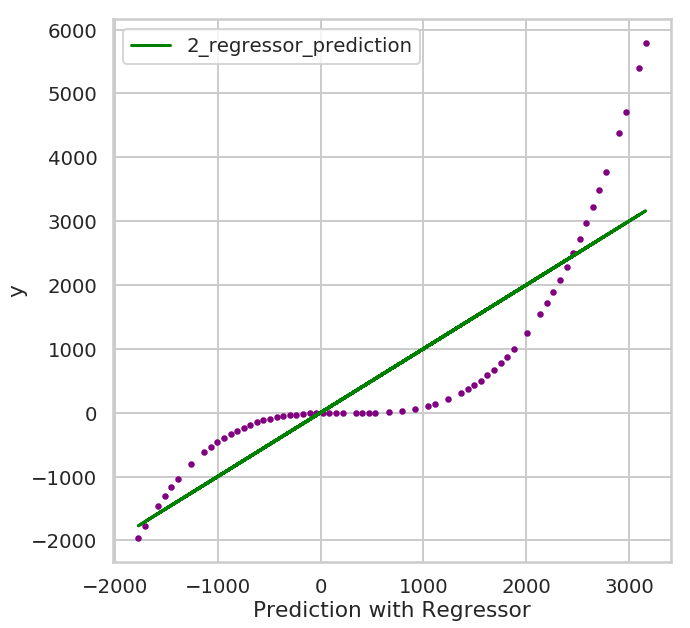

In [13]:
fig, ax = plt.subplots(figsize = (10,10)) 
tt.plot(ax=ax,kind='scatter',x='2_regressor_prediction',y='y', color = 'purple') 
ax.plot(tt['2_regressor_prediction'],tt['2_regressor_prediction'],'g-')
ax.set(xlabel = 'Prediction with Regressor', ylabel = 'y')
ax.legend()

### Task 7: Generate regressors in the validation sample in range from M=12(Max power of x) and compute the model prediction.Visualize the fit of the model.

## Putting 12 Regressors in Training Set 

In [14]:
M = 12
for p in range(1,M+1): 
    temp_data['x%d'%p]=temp_data.x**p
temp_data.head()

,x,y,Prediction,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
18,-6.0,-190.366598,-683.250517,-6.0,36.00,-216.000,1296.0000,-7.776000e+03,4.665600e+04,-2.799360e+05,1.679616e+06,-1.007770e+07,6.046618e+07,-3.627971e+08,2.176782e+09
58,14.0,997.777927,1879.307847,14.0,196.00,2744.000,38416.0000,5.378240e+05,7.529536e+06,1.054135e+08,1.475789e+09,2.066105e+10,2.892547e+11,4.049565e+12,5.669391e+13
24,-3.0,-35.624306,-298.866762,-3.0,9.00,-27.000,81.0000,-2.430000e+02,7.290000e+02,-2.187000e+03,6.561000e+03,-1.968300e+04,5.904900e+04,-1.771470e+05,5.314410e+05
74,22.0,4371.531453,2904.331193,22.0,484.00,10648.000,234256.0000,5.153632e+06,1.133799e+08,2.494358e+09,5.487587e+10,1.207269e+12,2.655992e+13,5.843183e+14,1.285500e+16
19,-5.5,-152.135063,-619.186558,-5.5,30.25,-166.375,915.0625,-5.032844e+03,2.768064e+04,-1.522435e+05,8.373394e+05,-4.605367e+06,2.532952e+07,-1.393123e+08,7.662179e+08


## Fitting the model with Training Set

In [15]:
R2 = []; Params = []
for M in range(1,M+1):
    lm = smf.ols(formula = 'y~x'+'+'*(M>1)+'+'.join(['x%d'%p for p in range(2,M+1)]), data = temp_data).fit()
    R2.append(lm.rsquared)
    Params.append(lm.params)

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.449e+05
Date:                Wed, 23 Oct 2019   Prob (F-statistic):          5.32e-115
Time:                        02:36:25   Log-Likelihood:                -241.94
No. Observations:                  64   AIC:                             503.9
Df Residuals:                      54   BIC:                             525.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0004    1.7e-05    -20.734      0.0

## Visualizing the fit for each power

<Figure size 432x288 with 0 Axes>

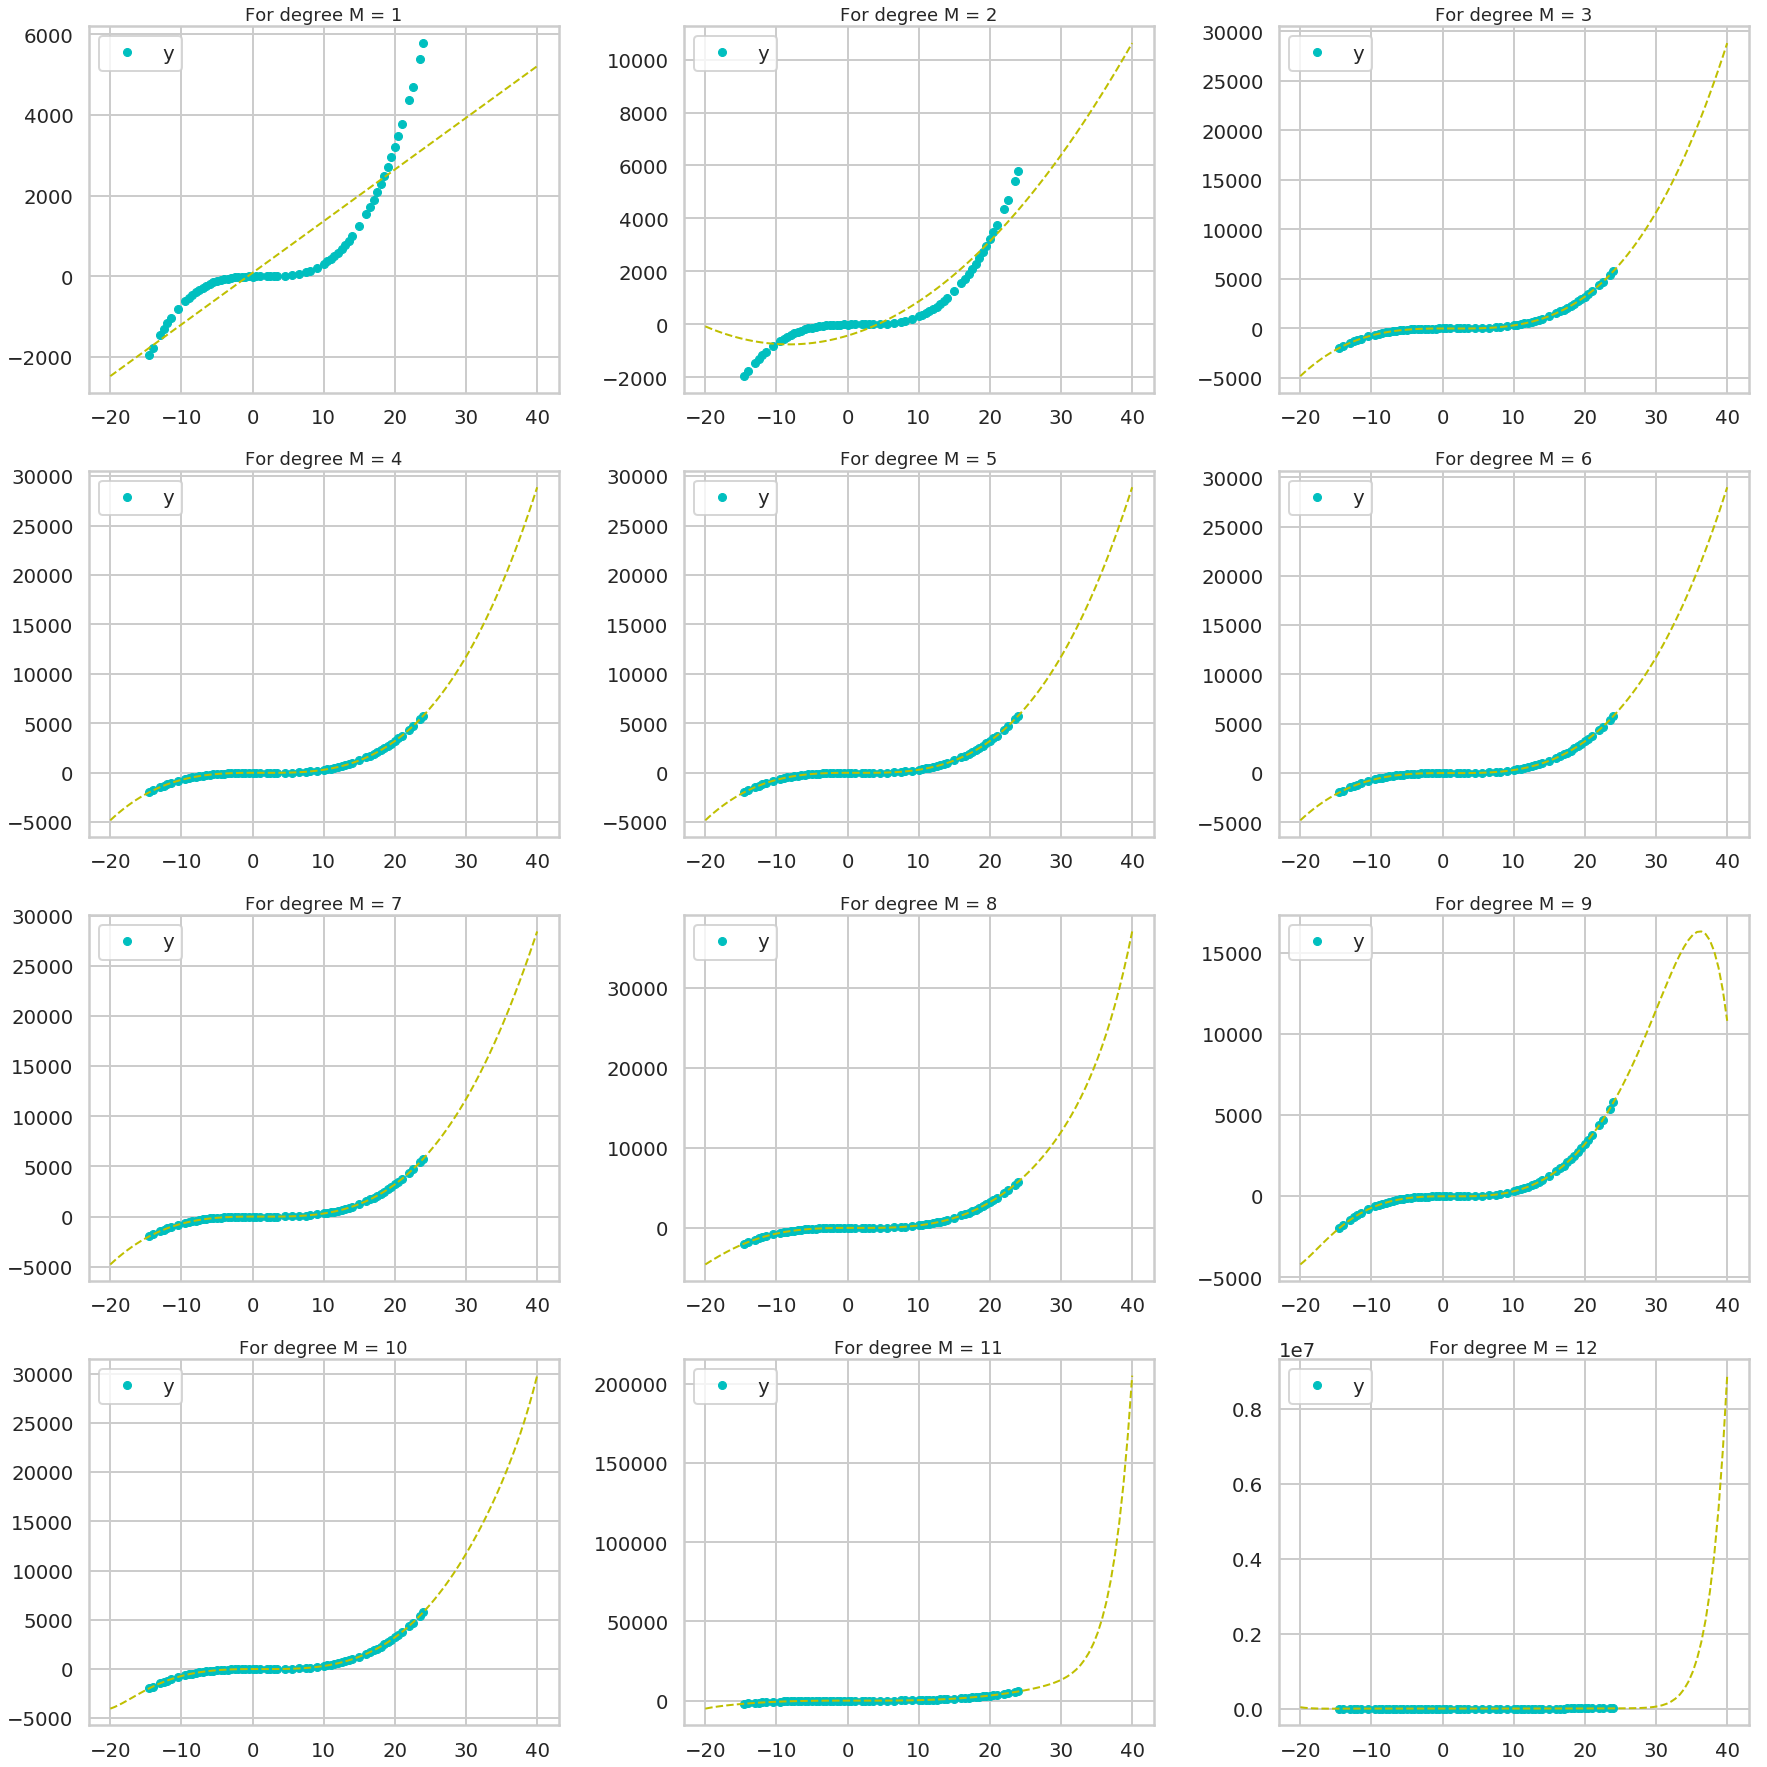

In [16]:
plt.clf()
plt.figure(figsize = (25,25))


for M in range(1,M+1):
    
    plt.subplot(4,3,M)
    
    x_fit = np.linspace(-20,40,100)
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range( M+1)]).T, columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)
    
    
    plt.plot(temp_data.x1, temp_data.y, 'co', markersize = 8) 
    plt.plot(x_fit, y_fit, 'y--', lw = 2)     
    plt.title('For degree M = %d'%(M), fontsize = 18)

    plt.legend()
    plt.tight_layout()

## Addidng 12 powers to Validation data set

In [17]:
temp_valid=validate_data.copy()

M = 12
for p in range(1,M+1): 
    temp_valid['x%d'%p]=temp_valid.x**p
temp_valid.head()

,x,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
73,21.5,4064.435650,21.5,462.25,9938.375,213675.0625,4.594014e+06,9.877130e+07,2.123583e+09,4.565703e+10,9.816262e+11,2.110496e+13,4.537567e+14,9.755769e+15
59,14.5,1115.185729,14.5,210.25,3048.625,44205.0625,6.409734e+05,9.294114e+06,1.347647e+08,1.954088e+09,2.833427e+10,4.108469e+11,5.957280e+12,8.638056e+13
33,1.5,-7.816780,1.5,2.25,3.375,5.0625,7.593750e+00,1.139062e+01,1.708594e+01,2.562891e+01,3.844336e+01,5.766504e+01,8.649756e+01,1.297463e+02
8,-11.0,-917.935911,-11.0,121.00,-1331.000,14641.0000,-1.610510e+05,1.771561e+06,-1.948717e+07,2.143589e+08,-2.357948e+09,2.593742e+10,-2.853117e+11,3.138428e+12
0,-15.0,-2156.994097,-15.0,225.00,-3375.000,50625.0000,-7.593750e+05,1.139062e+07,-1.708594e+08,2.562891e+09,-3.844336e+10,5.766504e+11,-8.649756e+12,1.297463e+14


## Fitting the validation data set to the model

In [18]:
temp_valid['ypred']=lm.predict(temp_valid)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.449e+05
Date:                Wed, 23 Oct 2019   Prob (F-statistic):          5.32e-115
Time:                        02:36:30   Log-Likelihood:                -241.94
No. Observations:                  64   AIC:                             503.9
Df Residuals:                      54   BIC:                             525.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0004    1.7e-05    -20.734      0.0

## Plotting the visualization 






<Figure size 432x288 with 0 Axes>

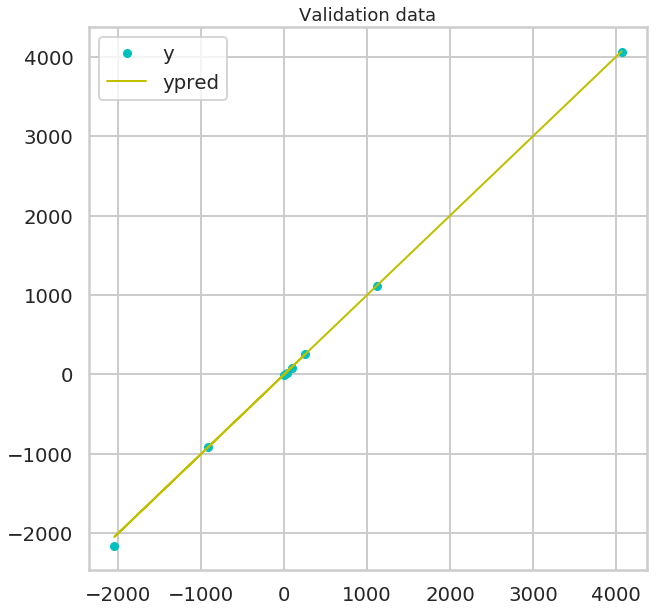

In [19]:
'''plt.clf()
plt.figure(figsize = (25,25))


for M in range(1,M+1):
    
    plt.subplot(4,3,M)
    
    x_fit = np.linspace(-20,20,100)
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range( M+1)]).T, columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)
    
    
    plt.plot(temp_valid.x1, temp_valid.y, 'co', markersize = 8) 
    plt.plot(x_fit, y_fit, 'y--', lw = 2)     
    plt.title('For degree M = %d'%(M), fontsize = 18)

    plt.legend()
    plt.tight_layout()'''


plt.clf()
plt.figure(figsize = (10,10))
plt.plot(temp_valid.ypred, temp_valid.y, 'co', markersize = 8)
plt.plot(temp_valid.ypred, temp_valid.ypred, 'y-', lw =2)
plt.title('Validation data', fontsize = 18)

plt.legend()

### Task 8:Compute R2 over the validation data

In [20]:
print("R2_Score for Validation Data: {}".format(r2_score(temp_valid.y, temp_valid.ypred)))

R2_Score for Validation Data: 0.9994395400165887


In [21]:
R2 = []; Params = []
'''
for M in range(1,13):
    formula='y~x'+'+'*(M>1)+'+'.join(['x%d'%p for p in range(2,M+1)]);
    lm = smf.ols(formula = formula).fit(validate_data)
    R2.append(ax.rsquared)
    Params.append(ax.params)

plt.title('R2 depending on the degree')
plt.plot(range(1,13),R2)
'''

"\nfor M in range(1,13):\n    formula='y~x'+'+'*(M>1)+'+'.join(['x%d'%p for p in range(2,M+1)]);\n    lm = smf.ols(formula = formula).fit(validate_data)\n    R2.append(ax.rsquared)\n    Params.append(ax.params)\n\nplt.title('R2 depending on the degree')\nplt.plot(range(1,13),R2)\n"

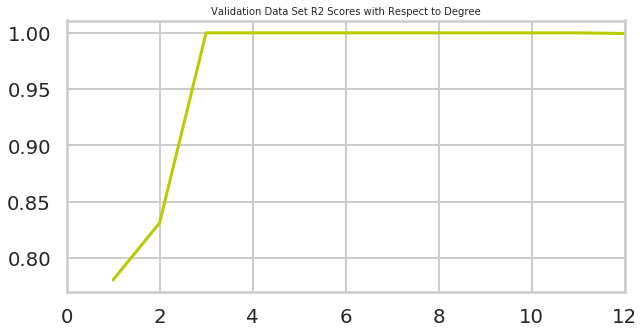

In [22]:
R2v = [[] for i in range(12)]
lmv = [[] for i in range(12)]

for M in range(1,13):
    lmv[M-1] = smf.ols(formula='y~x'+'+'*(M>1)+'+'.join(['x%d'%p for p in range(2,M+1)]), data = temp_data).fit()
    temp_valid['preds']=lmv[M-1].predict(temp_valid)
    R2v[M-1]=1-((temp_valid.preds-temp_valid.y)**2).sum()/((temp_valid.y-temp_valid.y.mean())**2).sum()
plt.figure(figsize=(10,5))
plt.xlim(0,12)
plt.title("Validation Data Set R2 Scores with Respect to Degree", fontsize = 10)
plt.plot(range(1,13), R2v, color = '#b8cc00')

### Task 9: Did you get an optimal value with M=12?

# Although we do get a "kind-of" optimal value, however, it must be disregarded completely as the fit that results for power M = 12 is a clear cut case of overfitting. As the power of x keeps increasing in powers, the line fit keeps adjusting itself causing more and more deepened concept of overfitting on the data set. A better value of M stands for when M = 3.

### Task 10:Generate regressors in the test sample and compute the model prediction

## Adding 12 regressors in the test sample!

In [23]:
temp_test = test_data.copy()

M = 12
for p in range(1,M+1): 
    temp_test['x%d'%p] = temp_test.x**p
temp_test.head()

,x,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12
10,-10.0,-710.237424,-10.0,100.00,-1000.000,10000.0000,-1.000000e+05,1.000000e+06,-1.000000e+07,1.000000e+08,-1.000000e+09,1.000000e+10,-1.000000e+11,1.000000e+12
76,23.0,5049.983454,23.0,529.00,12167.000,279841.0000,6.436343e+06,1.480359e+08,3.404825e+09,7.831099e+10,1.801153e+12,4.142651e+13,9.528098e+14,2.191462e+16
3,-13.5,-1610.924846,-13.5,182.25,-2460.375,33215.0625,-4.484033e+05,6.053445e+06,-8.172151e+07,1.103240e+09,-1.489375e+10,2.010656e+11,-2.714385e+12,3.664420e+13
38,4.0,7.489708,4.0,16.00,64.000,256.0000,1.024000e+03,4.096000e+03,1.638400e+04,6.553600e+04,2.621440e+05,1.048576e+06,4.194304e+06,1.677722e+07
61,15.5,1392.899555,15.5,240.25,3723.875,57720.0625,8.946610e+05,1.386725e+07,2.149423e+08,3.331606e+09,5.163989e+10,8.004182e+11,1.240648e+13,1.923005e+14


## Computing the model prediction for Test Data

In [24]:
temp_test['pred'] = lm.predict(temp_test)
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.449e+05
Date:                Wed, 23 Oct 2019   Prob (F-statistic):          5.32e-115
Time:                        02:36:31   Log-Likelihood:                -241.94
No. Observations:                  64   AIC:                             503.9
Df Residuals:                      54   BIC:                             525.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0004    1.7e-05    -20.734      0.0

### Task 11:Visulaize results of Task 10.

<Figure size 432x288 with 0 Axes>

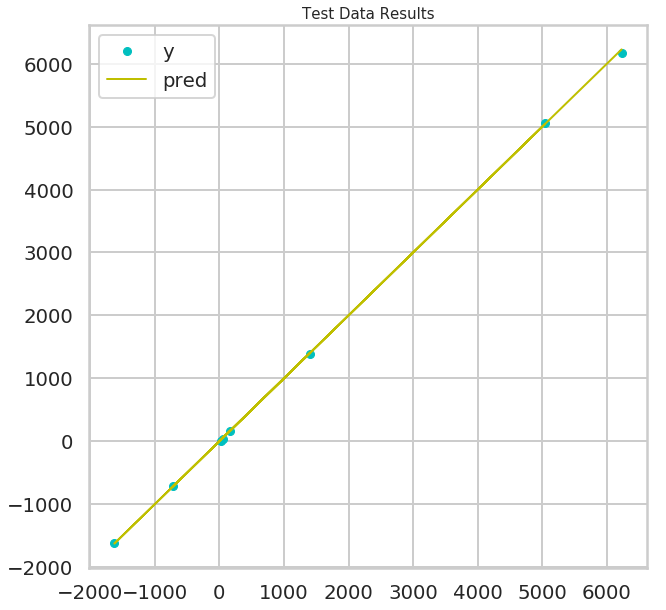

In [25]:
'''plt.clf()
plt.figure(figsize = (25,25))


for M in range(1,M+1):
    
    plt.subplot(4,3,M)
    
    x_fit = np.linspace(-20,40,100)
    y_fit = pd.DataFrame(np.matrix([x_fit**k for k in range( M+1)]).T, columns = Params[M-1].index).mul(Params[M-1], 1).sum(1)
    
    
    plt.plot(temp_test.x1, temp_test.y, 'go', markersize = 8) 
    plt.plot(x_fit, y_fit, 'r--', lw = 2)     
    plt.title('For degree M = %d'%(M), fontsize = 18)

    plt.legend()
    plt.tight_layout()'''




plt.clf()
plt.figure(figsize = (10,10))
plt.plot(temp_test.pred, temp_test.y, 'co', markersize = 8)
plt.plot(temp_test.pred, temp_test.pred, 'y-', lw =2)
plt.title('Test Data Results', fontsize = 15)
plt.legend()


## R2 over Test Data

In [26]:
print("R2_Score for Test Data: {}".format(r2_score(temp_test.y, temp_test.pred)))

R2_Score for Test Data: 0.9999364947506723


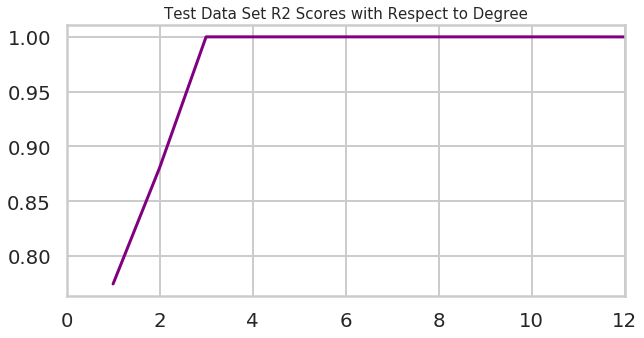

In [27]:
R2t = [[] for i in range(12)]
lmt = [[] for i in range(12)]

for M in range(1,13):
    lmt[M-1] = smf.ols(formula='y~x'+'+'*(M>1)+'+'.join(['x%d'%p for p in range(2,M+1)]), data = temp_data).fit()
    temp_test['preds']=lmt[M-1].predict(temp_test)
    R2t[M-1]=lmt[M-1].rsquared
plt.figure(figsize=(10,5))
plt.xlim(0,12)
plt.title("Test Data Set R2 Scores with Respect to Degree", fontsize = 15)
plt.plot(range(1,13), R2t, color='purple')

## Problem 2:Refer the in class session_05_02 diagnostics python notebook ,to complete this part of the assignment.

### Task 1: Perform regression on Advanced vs Other, "Advanced" which incorporated Master, Doctorate and ProfSchool and "Other" incorporating less than Bachelor.Your regression model will be between predicted and observed income.

In [28]:
income = pd.read_csv('/content/drive/My Drive/education.csv')
income.drop(columns = 'Unnamed: 0', inplace = True)
income.head()

,IncomePerCapita,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool
0,77512.0,0.085069,0.101972,0.127082,0.371203,0.208966,0.031786,0.073922
1,26905.0,0.347436,0.208724,0.140025,0.208774,0.065663,0.010520,0.018857
2,79088.0,0.036399,0.068234,0.109660,0.436064,0.220825,0.039483,0.089335
3,98020.0,0.012725,0.038175,0.133831,0.431768,0.241334,0.037736,0.104432
4,99633.0,0.022338,0.017299,0.076251,0.461035,0.274941,0.036782,0.111354


In [0]:
income.dropna(inplace = True)

In [30]:
income.head()

,IncomePerCapita,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool
0,77512.0,0.085069,0.101972,0.127082,0.371203,0.208966,0.031786,0.073922
1,26905.0,0.347436,0.208724,0.140025,0.208774,0.065663,0.010520,0.018857
2,79088.0,0.036399,0.068234,0.109660,0.436064,0.220825,0.039483,0.089335
3,98020.0,0.012725,0.038175,0.133831,0.431768,0.241334,0.037736,0.104432
4,99633.0,0.022338,0.017299,0.076251,0.461035,0.274941,0.036782,0.111354


In [0]:
income['Advanced'] = income['Master']+income['Doctorate']+income['ProfSchool']
income['Other'] = income['LessThanHS']+income['HighSchool']+income['SomeCollege']

In [32]:
income.head()

,IncomePerCapita,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool,Advanced,Other
0,77512.0,0.085069,0.101972,0.127082,0.371203,0.208966,0.031786,0.073922,0.314674,0.314123
1,26905.0,0.347436,0.208724,0.140025,0.208774,0.065663,0.010520,0.018857,0.095040,0.696186
2,79088.0,0.036399,0.068234,0.109660,0.436064,0.220825,0.039483,0.089335,0.349643,0.214293
3,98020.0,0.012725,0.038175,0.133831,0.431768,0.241334,0.037736,0.104432,0.383502,0.184730
4,99633.0,0.022338,0.017299,0.076251,0.461035,0.274941,0.036782,0.111354,0.423077,0.115888


In [33]:
lmm = smf.ols(formula = 'IncomePerCapita ~ Bachelor + Advanced + Other-1', data = income).fit()
income['Predictions'] = lmm.predict()
print(lmm.summary())

                            OLS Regression Results                            
Dep. Variable:        IncomePerCapita   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     472.5
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           6.38e-72
Time:                        02:36:33   Log-Likelihood:                -1954.6
No. Observations:                 181   AIC:                             3915.
Df Residuals:                     178   BIC:                             3925.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bachelor    6.273e+04   1.94e+04      3.226      0.0

In [34]:
'''lm3 = smf.ols(formula = 'IncomePerCapita ~ Advanced', data = income).fit()
income['Aprediction'] = lm3.predict()
print(lm3.summary())
'''

"lm3 = smf.ols(formula = 'IncomePerCapita ~ Advanced', data = income).fit()\nincome['Aprediction'] = lm3.predict()\nprint(lm3.summary())\n"

In [35]:
'''
lm3 = smf.ols(formula = 'IncomePerCapita ~ Other', data = income).fit()
income['Oprediction'] = lm3.predict()
print(lm3.summary())
'''

"\nlm3 = smf.ols(formula = 'IncomePerCapita ~ Other', data = income).fit()\nincome['Oprediction'] = lm3.predict()\nprint(lm3.summary())\n"

In [36]:
income.head()

,IncomePerCapita,LessThanHS,HighSchool,SomeCollege,Bachelor,Master,Doctorate,ProfSchool,Advanced,Other,Predictions
0,77512.0,0.085069,0.101972,0.127082,0.371203,0.208966,0.031786,0.073922,0.314674,0.314123,76489.828365
1,26905.0,0.347436,0.208724,0.140025,0.208774,0.065663,0.010520,0.018857,0.095040,0.696186,26499.639194
2,79088.0,0.036399,0.068234,0.109660,0.436064,0.220825,0.039483,0.089335,0.349643,0.214293,87068.287324
3,98020.0,0.012725,0.038175,0.133831,0.431768,0.241334,0.037736,0.104432,0.383502,0.184730,92804.494199
4,99633.0,0.022338,0.017299,0.076251,0.461035,0.274941,0.036782,0.111354,0.423077,0.115888,101812.027598


### Task 2: Visualize the regression fit by plotting the observation versus our prediction for the income per zip code.

## Visualization between Advanced and Income Per Capita

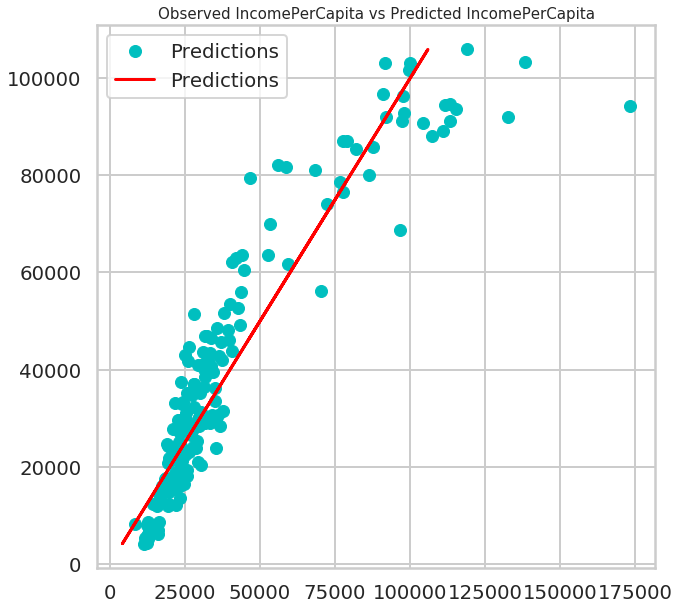

In [37]:
plt.figure(figsize=(10,10))
plt.plot(income.IncomePerCapita, income.Predictions, 'co')
plt.title('Observed IncomePerCapita vs Predicted IncomePerCapita', fontsize = 15)
plt.plot(income.Predictions, income.Predictions, 'r-')
plt.legend()

## Visualization between Others and Income Per Capita

In [38]:
'''plt.figure(figsize=(10,10))
plt.plot(income.Other, income.IncomePerCapita, 'ro', markersize = 7)
plt.title('Other vs IncomePerCapita', fontsize = 15)
plt.plot(income.Other, income.Oprediction, 'c-')
plt.legend()
'''

"plt.figure(figsize=(10,10))\nplt.plot(income.Other, income.IncomePerCapita, 'ro', markersize = 7)\nplt.title('Other vs IncomePerCapita', fontsize = 15)\nplt.plot(income.Other, income.Oprediction, 'c-')\nplt.legend()\n"

## Problem 3:Refer in class session_05_01 Scaling python notebook to complete this part of the assignment.

### Task 1:Establish a scaling relationship  Y∼CXq  between total, violent and property crime vs population (by running log-scale regression where Crime>0). Visualize on the log scale. Does  q=1  fall into the 95% confidence interval? What about 99% CI?

In [39]:
msa= pd.read_csv('/content/drive/My Drive/Untitled folder/msalist.csv', encoding = 'unicode_escape')
msa.head()

,msa,msa_name,Geo_FIPS,county
0,10180,"Abilene, TX (Metropolitan Statistical Area)",48059,"Callahan, TX"
1,10180,"Abilene, TX (Metropolitan Statistical Area)",48253,"Jones, TX"
2,10180,"Abilene, TX (Metropolitan Statistical Area)",48441,"Taylor, TX"
3,10420,"Akron, OH (Metropolitan Statistical Area)",39133,"Portage, OH"
4,10420,"Akron, OH (Metropolitan Statistical Area)",39153,"Summit, OH"


In [0]:
msaNames={r['msa']:r['msa_name'] for i,r in msa.iterrows()}

In [41]:
demographics = pd.read_csv('/content/drive/My Drive/Untitled folder/demographics.csv', encoding = 'unicode_escape')
demographics.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATECE,Geo_STATE,Geo_COUNTY,Geo_COUSUB,Geo_PLACE,Geo_PLACESE,Geo_TRACT,Geo_BLKGRP,Geo_CONCIT,Geo_AIANHH,Geo_AIANHHFP,Geo_AIHHTLI,Geo_AITSCE,Geo_AITS,Geo_ANRC,Geo_CBSA,Geo_CSA,Geo_METDIV,Geo_MACC,Geo_MEMI,Geo_NECTA,Geo_CNECTA,Geo_NECTADIV,Geo_UA,Geo_UACP,Geo_CDCURR,Geo_SLDU,Geo_SLDL,Geo_VTD,Geo_ZCTA3,Geo_ZCTA5,Geo_SUBMCD,Geo_SDELM,Geo_SDSEC,Geo_SDUNI,Geo_UR,Geo_PCI,Geo_TAZ,Geo_UGA,Geo_BTTR,Geo_BTBG,Geo_PUMA5,Geo_PUMA1,SE_T001_001,SE_T002_001,SE_T002_002,SE_T002_003,SE_T003_001,SE_T003_002,SE_T003_003,SE_T057_001,SE_T083_001
0,1001,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",al,50,0,ACSSF,13,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55136,55136,92.75346,594.436089,604.3882,594.4361,9.952067,52475,24644
1,1003,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",al,50,0,ACSSF,14,NaN,NaN,NaN,NaN,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,191205,191205,120.27100,1589.784070,2027.3110,1589.7840,437.527200,50183,26851
2,1005,05000US01005,"Barbour County, Alabama","Barbour County, Alabama",al,50,0,ACSSF,15,NaN,NaN,NaN,NaN,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27119,27119,30.64722,884.876304,904.5153,884.8763,19.638980,35634,17350
3,1007,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",al,50,0,ACSSF,16,NaN,NaN,NaN,NaN,1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22653,22653,36.38555,622.582332,626.1689,622.5823,3.586525,37984,18110
4,1009,05000US01009,"Blount County, Alabama","Blount County, Alabama",al,50,0,ACSSF,17,NaN,NaN,NaN,NaN,1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57645,57645,89.40315,644.775905,650.6282,644.7759,5.852321,44409,20501


In [0]:
demographics = demographics[[ u'Geo_GEOID', u'Geo_NAME', u'Geo_QName', u'Geo_COUNTY',\
                             u'SE_T001_001', u'SE_T002_002', u'SE_T002_003', u'SE_T057_001', u'SE_T083_001']]

demographics.rename(columns={u'SE_T001_001' : 'Population',\
                             u'SE_T002_002' : 'Population Density', \
                             u'SE_T002_003' : 'Area',\
                             u'SE_T057_001' : 'Median household income',\
                             u'SE_T083_001' : 'Per capita income'}, inplace=True)

In [0]:
demographics['Income']=demographics.Population*demographics['Per capita income']

In [44]:
def num(s):
    try:
        return int(s)
    except ValueError:
        0

demographics['ID'] = demographics.Geo_GEOID.apply(lambda x: num(x[7:]))
msa['ID'] = msa.Geo_FIPS.apply(num)

demomsa = pd.merge(demographics, msa, on='ID', how='inner')
demomsa.head()

,Geo_GEOID,Geo_NAME,Geo_QName,Geo_COUNTY,Population,Population Density,Area,Median household income,Per capita income,Income,ID,msa,msa_name,Geo_FIPS,county
0,05000US01001,"Autauga County, Alabama","Autauga County, Alabama",1,55136,92.75346,594.436089,52475,24644,1358771584,1001,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,05000US01003,"Baldwin County, Alabama","Baldwin County, Alabama",3,191205,120.27100,1589.784070,50183,26851,5134045455,1003,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,05000US01007,"Bibb County, Alabama","Bibb County, Alabama",7,22653,36.38555,622.582332,37984,18110,410245830,1007,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,05000US01009,"Blount County, Alabama","Blount County, Alabama",9,57645,89.40315,644.775905,44409,20501,1181780145,1009,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,05000US01015,"Calhoun County, Alabama","Calhoun County, Alabama",15,117186,193.41850,605.867678,40919,21306,2496764916,1015,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [0]:
msaDemo = demomsa.groupby(by='msa').sum().loc[:,[u'Population', u'Area', u'Income']]

In [0]:
crime2014 = pd.read_csv('/content/drive/My Drive/Untitled folder/R11460954_SL050.csv') 

In [0]:
crime2014.rename(columns = { u'SE_T001_001' : 'Population',\
                             u'SE_T002_001' : 'Crimes',\
                          u'SE_T002_002' : 'Violent Crimes', \
                          u'SE_T002_003' : 'Property Crimes' }, inplace=True)

crime2014 = crime2014[[u'Geo_FIPS', u'Geo_NAME', u'Geo_QNAME', u'Geo_STATE', u'Geo_COUNTY', 'Population', 'Crimes' , 'Violent Crimes', 'Property Crimes']]

In [48]:
def num(s):
    try:
        return int(s)
    except ValueError:
        0

demographics['ID'] = demographics.Geo_GEOID.apply(lambda x: num(x[7:]))
crime2014['ID'] = crime2014.Geo_FIPS.apply(num)
msa['ID'] = msa.Geo_FIPS.apply(num)

demomsa = pd.merge(demographics, msa, on='ID', how='inner')
crimemsa = pd.merge(crime2014, msa, on='ID', how='inner')
crimemsa.head()

,Geo_FIPS_x,Geo_NAME,Geo_QNAME,Geo_STATE,Geo_COUNTY,Population,Crimes,Violent Crimes,Property Crimes,ID,msa,msa_name,Geo_FIPS_y,county
0,01001,Autauga County,"Autauga County, Alabama",1,001,55395.0,482,68,414,1001.0,33860,"Montgomery, AL (Metropolitan Statistical Area)",1001,"Autauga, AL"
1,01003,Baldwin County,"Baldwin County, Alabama",1,003,200111.0,760,98,662,1003.0,19300,"Daphne-Fairhope-Foley, AL (Metropolitan Statis...",1003,"Baldwin, AL"
2,01007,Bibb County,"Bibb County, Alabama",1,007,22506.0,86,4,82,1007.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1007,"Bibb, AL"
3,01009,Blount County,"Blount County, Alabama",1,009,57719.0,1013,90,923,1009.0,13820,"Birmingham-Hoover, AL (Metropolitan Statistica...",1009,"Blount, AL"
4,01015,Calhoun County,"Calhoun County, Alabama",1,015,115916.0,486,15,471,1015.0,11500,"Anniston-Oxford-Jacksonville, AL (Metropolitan...",1015,"Calhoun, AL"


In [49]:
msaCrime = crimemsa.groupby(by='msa').sum().loc[:,[u'Population', u'Crimes', u'Violent Crimes', u'Property Crimes']]
msaCrime.head()

,Population,Crimes,Violent Crimes,Property Crimes
msa,,,,
10180,168592.0,492,62,430
10420,703825.0,2397,106,2291
10500,151670.0,1364,107,1257
10540,119356.0,1092,23,1069
10580,880167.0,1590,91,1499


In [0]:
msaCrime = (msaCrime.where(msaCrime.Crimes>0))

In [51]:
msaCrime.sort_values(by = 'Crimes', ascending = True)

,Population,Crimes,Violent Crimes,Property Crimes
msa,,,,
11020,125955.0,1.0,1.0,0.0
21500,278443.0,2.0,0.0,2.0
36140,95344.0,3.0,2.0,1.0
10900,407571.0,3.0,0.0,3.0
49620,440755.0,5.0,5.0,0.0
39740,413691.0,5.0,5.0,0.0
14460,300621.0,9.0,5.0,4.0
38300,2154097.0,17.0,12.0,5.0
38540,83347.0,65.0,7.0,58.0


In [0]:
msaCrime.dropna(inplace = True, how = 'any')

In [0]:
msaCrime.rename(columns={'Violent Crimes':'Violent', 'Property Crimes':'Property'}, inplace = True)

In [54]:
population_log = np.log(msaCrime['Population'])
crimes_log = np.log(msaCrime['Crimes'])
violent_log = np.log(msaCrime['Violent'])
property_log = np.log(msaCrime['Property'])

final_data = pd.DataFrame(data=[crimes_log, population_log, violent_log, property_log]).T
final_data.sort_values(by='Crimes', ascending=False, inplace=True) 
final_data.head()


,Crimes,Population,Violent,Property
msa,,,,
26420,11.198352,15.685801,9.287764,11.038191
33100,11.025784,15.595504,9.090768,10.869806
36740,10.683661,14.657689,8.882114,10.503285
45300,10.571035,14.885580,8.373323,10.453313
24860,10.098890,13.667548,8.106515,9.952278


># Note to Instructor, I removed ***-inf*** and ***NaNs*** from the Violent and Property columns of the table, so results may change for regression and correlation

In [0]:
final_data = final_data.where((final_data.Violent>0)&(final_data.Property>0))
final_data.dropna(inplace = True, how= 'any')

In [56]:
final_data.head()

,Crimes,Population,Violent,Property
msa,,,,
26420,11.198352,15.685801,9.287764,11.038191
33100,11.025784,15.595504,9.090768,10.869806
36740,10.683661,14.657689,8.882114,10.503285
45300,10.571035,14.885580,8.373323,10.453313
24860,10.098890,13.667548,8.106515,9.952278


In [57]:
reg = smf.ols(formula = 'Crimes~Population', data = final_data).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Crimes   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     317.9
Date:                Wed, 23 Oct 2019   Prob (F-statistic):           3.11e-50
Time:                        02:36:34   Log-Likelihood:                -435.32
No. Observations:                 331   AIC:                             874.6
Df Residuals:                     329   BIC:                             882.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9512      0.574     -5.140      0.0

$$log(Crimes)= 0.8132 log(Population) - 2.9512$$ 



In [58]:
'''cpr = smf.ols(formula = 'Crimes~Population', data = final_data).fit()
print(cpr.summary())
'''

"cpr = smf.ols(formula = 'Crimes~Population', data = final_data).fit()\nprint(cpr.summary())\n"

In [59]:
reg.conf_int(alpha=0.05)

,0,1
Intercept,-4.080686,-1.82172
Population,0.723514,0.90297


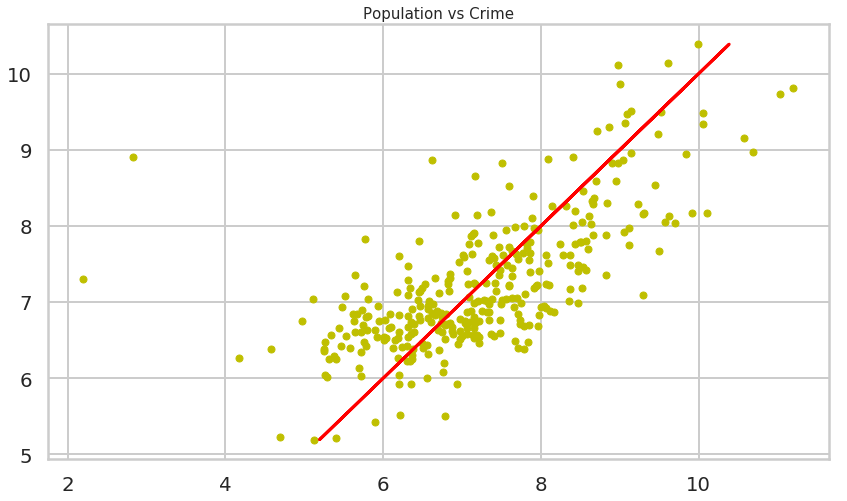

In [60]:
plt.figure(figsize=(14,8))
plt.plot(final_data.Crimes, reg.predict(), 'yo', markersize = 7)
plt.title('Population vs Crime', fontsize = 15)
ax.set(xlabel='Crimes', ylabel='Population')
plt.plot(reg.predict(), reg.predict(), '-r')

In [61]:
'''final_data1 = final_data.copy()
final_data1.drop(['Crimes', 'Property'], axis = 1, inplace = True)
final_data1 = final_data1.where(final_data1['Violent']>0)
final_data1.sort_values(by='Violent', ascending = True)'''

"final_data1 = final_data.copy()\nfinal_data1.drop(['Crimes', 'Property'], axis = 1, inplace = True)\nfinal_data1 = final_data1.where(final_data1['Violent']>0)\nfinal_data1.sort_values(by='Violent', ascending = True)"

In [0]:
#final_data1.dropna(inplace = True, how = 'any')

In [0]:
#acp = smf.ols(formula = 'Violent~Population', data = final_data1).fit()
#print(vp.summary())

In [0]:
#vp = smf.ols(formula = 'Violent~Population', data = final_data1).fit()
#print(vp.summary())

In [0]:
#vp.conf_int(alpha=0.05)

In [0]:
#3vp.conf_int(alpha=0.01)

In [67]:
'''plt.figure(figsize=(14,8))
plt.plot(final_data1.Population, final_data1.Violent, 'go', markersize = 7)
plt.title('Violent Crime vs Population', fontsize = 15)
plt.plot(final_data1['Population'], vp.predict(), '-b')
ax.set(xlabel='Population', ylabel='Violent Crimes')
plt.legend()'''

"plt.figure(figsize=(14,8))\nplt.plot(final_data1.Population, final_data1.Violent, 'go', markersize = 7)\nplt.title('Violent Crime vs Population', fontsize = 15)\nplt.plot(final_data1['Population'], vp.predict(), '-b')\nax.set(xlabel='Population', ylabel='Violent Crimes')\nplt.legend()"

In [68]:
'''final_data2 = final_data.copy()
final_data2.drop(['Crimes', 'Violent'], axis = 1, inplace = True)
final_data2 = final_data2.where(final_data2['Property']>0)
final_data2.sort_values(by='Property', ascending = True)
final_data2.dropna(inplace = True, how = 'any')'''

"final_data2 = final_data.copy()\nfinal_data2.drop(['Crimes', 'Violent'], axis = 1, inplace = True)\nfinal_data2 = final_data2.where(final_data2['Property']>0)\nfinal_data2.sort_values(by='Property', ascending = True)\nfinal_data2.dropna(inplace = True, how = 'any')"

In [0]:
#pcpr = smf.ols(formula = 'Property~Population', data = final_data2).fit()
#print(pcpr.summary())

In [0]:
#pcpr.conf_int(alpha=0.05)

In [0]:
#pcpr.conf_int(alpha=0.01)

In [72]:
'''plt.figure(figsize=(14,8))
plt.plot(final_data2.Population, final_data2.Property, 'ro', markersize = 7)
plt.title('Property Crime vs Population', fontsize = 15)
ax.set(xlabel='Population', ylabel='Property Crime')
plt.plot(final_data2['Population'], pcpr.predict(), '-y')
plt.legend()'''

"plt.figure(figsize=(14,8))\nplt.plot(final_data2.Population, final_data2.Property, 'ro', markersize = 7)\nplt.title('Property Crime vs Population', fontsize = 15)\nax.set(xlabel='Population', ylabel='Property Crime')\nplt.plot(final_data2['Population'], pcpr.predict(), '-y')\nplt.legend()"

### Task 2: Find top 5 and last 5 cities by crime log-residual (difference between log-crime and above regression prediction)

In [73]:
final_data.head()

,Crimes,Population,Violent,Property
msa,,,,
26420,11.198352,15.685801,9.287764,11.038191
33100,11.025784,15.595504,9.090768,10.869806
36740,10.683661,14.657689,8.882114,10.503285
45300,10.571035,14.885580,8.373323,10.453313
24860,10.098890,13.667548,8.106515,9.952278


In [0]:
final_data['msaName']=final_data.index.map(msaNames)
final_data['Residual - Crime']=reg.predict()-final_data['Crimes']

In [75]:
print("Top 5 cities by crime log-residual")
print(final_data.sort_values(by='Residual - Crime',ascending=False).head(5))
print("\n\nLast 5 cities by crime log-residual")
print(final_data.sort_values(by='Residual - Crime',ascending=True).head(5))

Top 5 cities by crime log-residual
         Crimes  ...  Residual - Crime
msa              ...                  
38300  2.833213  ...          6.074998
14460  2.197225  ...          5.109488
37980  6.622736  ...          2.243404
38540  4.174387  ...          2.089067
39340  5.768321  ...          2.060773

[5 rows x 6 columns]


Last 5 cities by crime log-residual
          Crimes  ...  Residual - Crime
msa               ...                  
31420   9.294773  ...         -2.204234
24860  10.098890  ...         -1.935068
37860   9.490545  ...         -1.813378
35380   9.919656  ...         -1.751071
36740  10.683661  ...         -1.714614

[5 rows x 6 columns]


### Task 3:Is there any correlation between residual by income and residual by crime?

In [76]:
msaDemo.head()

,Population,Area,Income
msa,,,
10180,167171,2743.478027,3740034900
10420,703017,900.129156,19560044574
10500,156706,1932.557130,3172077530
10540,118270,2290.129282,2526602010
10580,875567,2811.554500,28078339939


In [77]:
final_data.head()

,Crimes,Population,Violent,Property,msaName,Residual - Crime
msa,,,,,,
26420,11.198352,15.685801,9.287764,11.038191,"Houston-The Woodlands-Sugar Land, TX (Metropol...",-1.393201
33100,11.025784,15.595504,9.090768,10.869806,"Miami-Fort Lauderdale-West Palm Beach, FL (Met...",-1.294066
36740,10.683661,14.657689,8.882114,10.503285,"Orlando-Kissimmee-Sanford, FL (Metropolitan St...",-1.714614
45300,10.571035,14.885580,8.373323,10.453313,"Tampa-St. Petersburg-Clearwater, FL (Metropoli...",-1.416657
24860,10.098890,13.667548,8.106515,9.952278,"Greenville-Anderson-Mauldin, SC (Metropolitan ...",-1.935068


In [78]:
msaDemo.head()

,Population,Area,Income
msa,,,
10180,167171,2743.478027,3740034900
10420,703017,900.129156,19560044574
10500,156706,1932.557130,3172077530
10540,118270,2290.129282,2526602010
10580,875567,2811.554500,28078339939


In [0]:
nd = pd.DataFrame(data = [np.log(msaDemo.Income), np.log(msaDemo.Population)]).T
nd.sort_values(by = 'Income', ascending= False, inplace = True)

In [80]:
nd.head()

,Income,Population
msa,,
35620,27.297920,16.804472
31080,26.677462,16.385106
16980,26.425884,16.068532
19100,26.019203,15.718069
37980,26.009518,15.609823


In [81]:
nd.Income.sum()

8640.86153718504

In [82]:
mf = smf.ols(formula = 'Income~Population', data = nd).fit()
mf_predict = mf.predict()
msaDemo['Residual - Income'] = mf_predict-nd.Income
msaDemo.head()

,Population,Area,Income,Residual - Income
msa,,,,
10180,167171,2743.478027,3740034900,0.101101
10420,703017,900.129156,19560044574,-0.025948
10500,156706,1932.557130,3172077530,0.197068
10540,118270,2290.129282,2526602010,0.125354
10580,875567,2811.554500,28078339939,-0.154064


In [83]:
temp_holder = msaDemo['Residual - Income']
final_data['Residual - Income'] = final_data.index.map(temp_holder)
final_data.corr()

,Crimes,Population,Violent,Property,Residual - Crime,Residual - Income
Crimes,1.000000,7.010103e-01,0.926145,0.997237,-7.131511e-01,0.140568
Population,0.701010,1.000000e+00,0.709107,0.680037,1.719812e-15,0.008566
Violent,0.926145,7.091070e-01,1.000000,0.900994,-6.016303e-01,0.125952
Property,0.997237,6.800369e-01,0.900994,1.000000,-7.298930e-01,0.138442
Residual - Crime,-0.713151,1.719812e-15,-0.601630,-0.729893,1.000000e+00,-0.188689
Residual - Income,0.140568,8.565747e-03,0.125952,0.138442,-1.886889e-01,1.000000


## Correlation between Residual - Crime and Residual Income is -0.188689. There exists an inverse relationship between Crime and Income, as one increases the other keeps decreases.